In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('spam.csv',encoding_errors= 'replace')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Steps
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Modle Building
5. Evaluation
6. Improvement
7. Website
8. Deploy


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last three columns as they contains most of the null Values 
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [6]:
# Rename Columns name for Better Understanding
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [7]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
for i in df.columns:
    print(i," ",df[i].unique())

target   ['ham' 'spam']
text   ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Missing Values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Check for Duplicates 
df.duplicated().sum()

403

In [14]:
df.shape

(5572, 2)

In [15]:
# Remove duplicates
df = df.drop_duplicates(keep = 'first')

In [16]:
df.shape

(5169, 2)

## 2. EDA

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

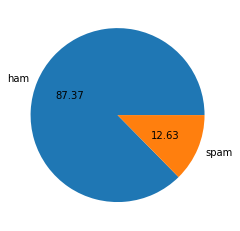

In [18]:
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct= '%0.2f')
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_character'] = df['text'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14220\2418167279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_character'] = df['text'].apply(len)


In [22]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_14220\87577862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [24]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_14220\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [26]:
df.head()

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.columns

Index(['target', 'text', 'num_character', 'num_word', 'num_sentences'], dtype='object')

In [28]:
df[['num_character', 'num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.454246,1.948152
std,58.174846,13.325668,1.363792
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
## Ham or not spam
df[df['target'] == 0][['num_character', 'num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.120903,1.799601
std,56.356802,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
## Spam 
df[df['target'] == 1][['num_character', 'num_word', 'num_sentences']].describe()

,num_character,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.975498
std,30.014336,7.011513,1.487993
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

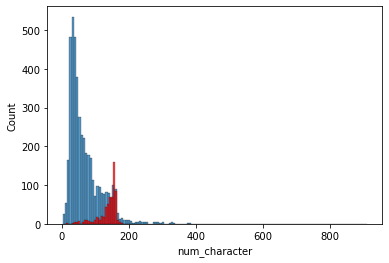

In [31]:
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color = 'red')

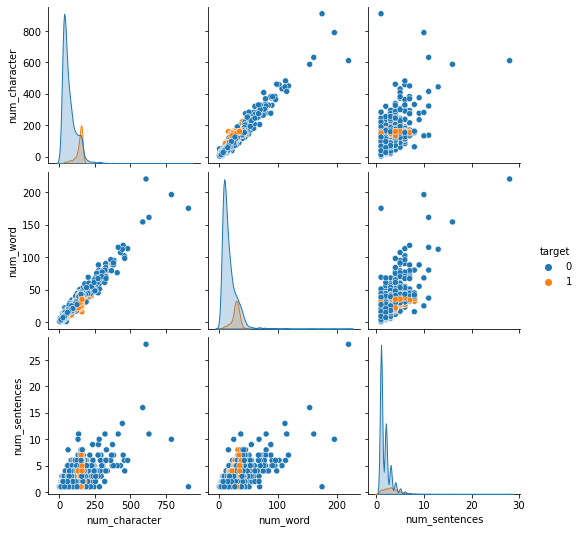

In [32]:
# Now we are going to check Corelation 
sns.pairplot(df,hue= 'target')

<AxesSubplot:>

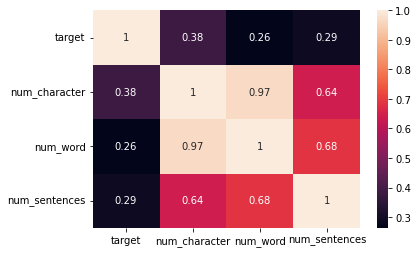

In [33]:
sns.heatmap(df.corr(),annot = True)

## Data Preprocessing
1. Lower Case
2. Tokenization
3. Removing special character
4. Removing stop words and Punctuation
5. Stemming

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import nltk
import nltk
from nltk.corpus import stopwords
import string

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [38]:
transform_text('I loved to watch bakchodi on you tube ')


'love watch bakchodi tube'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('better')

'better'

In [40]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14220\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [41]:
df.head()

,target,text,num_character,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)

9941

In [44]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [46]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [47]:
X.shape

(5169, 6677)

In [48]:
y = df['target'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [55]:
gnb.fit(X_train,y_train)
predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,predict1))
print(confusion_matrix(y_test,predict1))
print(precision_score(y_test,predict1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [56]:
print(accuracy_score(y_test,predict1))
print(confusion_matrix(y_test,predict1))
print(precision_score(y_test,predict1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [57]:
mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [58]:
bnb.fit(X_train,y_train)
pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(precision_score(y_test,pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


# Using Tf-idf Vectorizer 

In [59]:
tfidf = TfidfVectorizer(max_features = 3000)

In [60]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # X = scaler.fit_transform(X)

In [62]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
y = df['target'].values

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size = 0.2,random_state = 2)

In [65]:
gnb.fit(X_train,y_train)
predict1 = gnb.predict(X_test)
print(accuracy_score(y_test,predict1))
print(confusion_matrix(y_test,predict1))
print(precision_score(y_test,predict1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [66]:



mnb.fit(X_train,y_train)
pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(precision_score(y_test,pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


# Since Data is highly imbalance so we focus on precision rather than accuracy

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [68]:
svc = SVC(kernel ='sigmoid',gamma=1.0,probability=True)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [69]:
clfs = {
    'SVC': svc,
    'KN' : knc,
    'NB' : mnb,
    'DT':  dtc,
    'LR':  lrc,
    'RF':  rfc,
    'AdaBoost': abc,
    'BgC':   bc,
    'ETC':  etc,
    'GBDT': gbdt,
    'xgb' : xgb
    
}

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [72]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For", name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.971953578336557
Precision - 1.0
For DT
Accuracy - 0.9439071566731141
Precision - 0.7941176470588235
For LR
Accuracy - 0.9516441005802708
Precision - 0.9782608695652174
For RF
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For BgC
Accuracy - 0.9535783365570599
Precision - 0.8571428571428571
For ETC
Accuracy - 0.9787234042553191
Precision - 0.9833333333333333
For GBDT
Accuracy - 0.9574468085106383
Precision - 0.9433962264150944
For xgb
Accuracy - 0.9729206963249516
Precision - 0.9435483870967742


In [73]:
performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores})

In [74]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
3,DT,0.943907,0.794118
4,LR,0.951644,0.978261
5,RF,0.972921,0.982456
6,AdaBoost,0.961315,0.945455
7,BgC,0.953578,0.857143
8,ETC,0.978723,0.983333
9,GBDT,0.957447,0.943396


In [75]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [76]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.971954
3,DT,Accuracy,0.943907
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.972921
6,AdaBoost,Accuracy,0.961315
7,BgC,Accuracy,0.953578
8,ETC,Accuracy,0.978723
9,GBDT,Accuracy,0.957447


In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting = 'soft')

In [79]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et', ExtraTreesClassifier())],
                 voting='soft')

In [80]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [81]:
# Applying Stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()


In [82]:
from sklearn.ensemble import StackingClassifier

In [83]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [84]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.9796905222437138


In [85]:
print('Precision',precision_score(y_test,y_pred))

Precision 0.9465648854961832


In [86]:
import pickle
pickle.dump(tfidf,open('vetorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))